# DNA ANALYSIS

#### Testing open,read text file

In [313]:
# on ouvre le fichier
DNAFile_var = open("DNAFile.txt").read()

# examiner le fichier + type de variable
print(DNAFile_var)
print(type(DNAFile_var))

ATGCAATTGCTCGATTAGATGCBB
cgtTAAGGCTXAGCTTACGATxG
TTcggaAtcgaTCGGATTAA-N
GGCATTcgATAGCTTGGCAATC!
ATCGCGATTAA gcgttcggaat
CTAGGCTAACGTTAGCgatcga
GATCGATGGcatTCGGATCAAG
TTAGGCTTACGATC GATTCGGA
CGA_TCGTTAAGCTAGCTTGGCA
??ATCGATCGGATTAAGCTTGCA
<class 'str'>


#### CAS 1 > Où 1 seul sequence de DNA presente dans le fichier

In [316]:
# netoyer le string (garder que des lettres "ACGTURYSWKMBDHVN" et mettre tous les char en majuscule)
DNA_sequence = "".join([char for char in DNAFile_var.upper() if char in "ACGTURYSWKMBDHVN"])
print(DNA_sequence)

ATGCAATTGCTCGATTAGATGCBBCGTTAAGGCTAGCTTACGATGTTCGGAATCGATCGGATTAANGGCATTCGATAGCTTGGCAATCATCGCGATTAAGCGTTCGGAATCTAGGCTAACGTTAGCGATCGAGATCGATGGCATTCGGATCAAGTTAGGCTTACGATCGATTCGGACGATCGTTAAGCTAGCTTGGCAATCGATCGGATTAAGCTTGCA


In [318]:
#compter sequence de CG ou GC 
def count_sequence(input_sequence):
    #-------------------variables-------------------
    colored_sequence = "" #sequence coloré
    countGC = 0 # numero de sequence GC/CG trouvé
    countAT = 0
    i = 0 #index pour looping


    #-------------------loop-------------------
    # i pour index, c pour charactere
    while (i + 1 < len(input_sequence)):
        # detecter sequence CG/GC
        if (input_sequence[i] == 'C' and input_sequence[i+1] == 'G') or (input_sequence[i] == 'G' and input_sequence[i+1] == 'C'):
            # colorer sequence trouvé en vert
            colored_sequence += f"\033[32m{input_sequence[i]+input_sequence[i+1]}\033[0m"
            countGC += 1
            i += 1
        elif (input_sequence[i] == 'A' and input_sequence[i+1] == 'T') or (input_sequence[i] == 'T' and input_sequence[i+1] == 'A'):
            # colorer sequence trouvé en vert
            colored_sequence += f"\033[34m{input_sequence[i]+input_sequence[i+1]}\033[0m"
            countAT += 1
            i += 1
        else :
            colored_sequence += input_sequence[i]
        i+=1


    #-------------------Affichage/Debug-------------------
        #print(i,len(input_sequence),input_sequence[i])
    if i+1 == len(input_sequence) and (input_sequence[i] == 'G' or input_sequence[i] == 'C'):
        colored_sequence += input_sequence[i]
        
    print(f"{colored_sequence} - Counts (GC/CG) : {countGC} - Counts (AT/TA) : {countAT}")
    #print(len(colored_sequence)==len(input_sequence))


    #-------------------return-------------------
    return countGC,countAT

count_sequence(DNA_sequence)

ATGCAATTGCTCGATTAGATGCBBCGTTAAGGCTAGCTTACGATGTTCGGAATCGATCGGATTAANGGCATTCGATAGCTTGGCAATCATCGCGATTAAGCGTTCGGAATCTAGGCTAACGTTAGCGATCGAGATCGATGGCATTCGGATCAAGTTAGGCTTACGATCGATTCGGACGATCGTTAAGCTAGCTTGGCAATCGATCGGATTAAGCTTGC - Counts (GC/CG) : 39 - Counts (AT/TA) : 39


(39, 39)

#### Statistics

In [321]:
import matplotlib.pyplot as plt
import math

counts = count_sequence(DNA_sequence)
total_pairs = math.floor(len(DNA_sequence)/2)
sequence_labels = ("CG/GC","AT/TA")
for i in range(2):
    print(f"Fréquence de {sequence_labels[i]} : {((counts[i]/total_pairs)*100):.2f}%")

print(f"Ratio (CG/GC) over (AT/TA) : {counts[0]/counts[1]}")
print(f"Ratio (AT/TA) over (CG/GC) : {counts[1]/counts[0]}")

ATGCAATTGCTCGATTAGATGCBBCGTTAAGGCTAGCTTACGATGTTCGGAATCGATCGGATTAANGGCATTCGATAGCTTGGCAATCATCGCGATTAAGCGTTCGGAATCTAGGCTAACGTTAGCGATCGAGATCGATGGCATTCGGATCAAGTTAGGCTTACGATCGATTCGGACGATCGTTAAGCTAGCTTGGCAATCGATCGGATTAAGCTTGC - Counts (GC/CG) : 39 - Counts (AT/TA) : 39
Fréquence de CG/GC : 35.78%
Fréquence de AT/TA : 35.78%
Ratio (CG/GC) over (AT/TA) : 1.0
Ratio (AT/TA) over (CG/GC) : 1.0


#### CASE 2 > Où chaque ligne est une sequence de DNA dans le fichier

In [328]:
DNA_sequences = "".join([char for char in DNAFile_var.upper() if char in "ACGTURYSWKMBDHVN\n"])
print(DNA_sequences)

ATGCAATTGCTCGATTAGATGCBB
CGTTAAGGCTAGCTTACGATG
TTCGGAATCGATCGGATTAAN
GGCATTCGATAGCTTGGCAATC
ATCGCGATTAAGCGTTCGGAAT
CTAGGCTAACGTTAGCGATCGA
GATCGATGGCATTCGGATCAAG
TTAGGCTTACGATCGATTCGGA
CGATCGTTAAGCTAGCTTGGCA
ATCGATCGGATTAAGCTTGCA


In [330]:
#separer les sequences et les ajouter dans un list
list_sequences = DNA_sequences.split('\n')
print(list_sequences)

['ATGCAATTGCTCGATTAGATGCBB', 'CGTTAAGGCTAGCTTACGATG', 'TTCGGAATCGATCGGATTAAN', 'GGCATTCGATAGCTTGGCAATC', 'ATCGCGATTAAGCGTTCGGAAT', 'CTAGGCTAACGTTAGCGATCGA', 'GATCGATGGCATTCGGATCAAG', 'TTAGGCTTACGATCGATTCGGA', 'CGATCGTTAAGCTAGCTTGGCA', 'ATCGATCGGATTAAGCTTGCA']


In [332]:
#mettre ces sequences dans un dictionaire avec identifiers
dict_sequences = {f"ID{i+1}": s for i,s in enumerate(list_sequences)}
print(dict_sequences)

{'ID1': 'ATGCAATTGCTCGATTAGATGCBB', 'ID2': 'CGTTAAGGCTAGCTTACGATG', 'ID3': 'TTCGGAATCGATCGGATTAAN', 'ID4': 'GGCATTCGATAGCTTGGCAATC', 'ID5': 'ATCGCGATTAAGCGTTCGGAAT', 'ID6': 'CTAGGCTAACGTTAGCGATCGA', 'ID7': 'GATCGATGGCATTCGGATCAAG', 'ID8': 'TTAGGCTTACGATCGATTCGGA', 'ID9': 'CGATCGTTAAGCTAGCTTGGCA', 'ID10': 'ATCGATCGGATTAAGCTTGCA'}


In [374]:
dict_frequencies_GC = {} # structure: key of the sequence (identifier) + frequency of having (CG/GC) sequence
dict_frequencies_AT = {}

for identifier , sequence in dict_sequences.items():
    print(f"\n[{identifier}]")
    counts = count_sequence(sequence)
    total_pairs = math.floor(len(sequence)/2)
    
    dict_frequencies_GC[identifier] = (counts[0]/total_pairs)*100
    dict_frequencies_AT[identifier] = (counts[1]/total_pairs)*100
    print(f"(GC/CG) : {dict_frequencies_GC[identifier]:.02f}%")
    print(f"(AT/TA) : {dict_frequencies_AT[identifier]:.02f}%")
    print("Total pairs : ",total_pairs)


[ID1]
ATGCAATTGCTCGATTAGATGCB - Counts (GC/CG) : 4 - Counts (AT/TA) : 5
(GC/CG) : 33.33%
(AT/TA) : 41.67%
Total pairs :  12

[ID2]
CGTTAAGGCTAGCTTACGATG - Counts (GC/CG) : 4 - Counts (AT/TA) : 4
(GC/CG) : 40.00%
(AT/TA) : 40.00%
Total pairs :  10

[ID3]
TTCGGAATCGATCGGATTAA - Counts (GC/CG) : 3 - Counts (AT/TA) : 4
(GC/CG) : 30.00%
(AT/TA) : 40.00%
Total pairs :  10

[ID4]
GGCATTCGATAGCTTGGCAATC - Counts (GC/CG) : 4 - Counts (AT/TA) : 3
(GC/CG) : 36.36%
(AT/TA) : 27.27%
Total pairs :  11

[ID5]
ATCGCGATTAAGCGTTCGGAAT - Counts (GC/CG) : 4 - Counts (AT/TA) : 4
(GC/CG) : 36.36%
(AT/TA) : 36.36%
Total pairs :  11

[ID6]
CTAGGCTAACGTTAGCGATCG - Counts (GC/CG) : 4 - Counts (AT/TA) : 4
(GC/CG) : 36.36%
(AT/TA) : 36.36%
Total pairs :  11

[ID7]
GATCGATGGCATTCGGATCAAG - Counts (GC/CG) : 3 - Counts (AT/TA) : 4
(GC/CG) : 27.27%
(AT/TA) : 36.36%
Total pairs :  11

[ID8]
TTAGGCTTACGATCGATTCGG - Counts (GC/CG) : 4 - Counts (AT/TA) : 4
(GC/CG) : 36.36%
(AT/TA) : 36.36%
Total pairs :  11

[ID9]
CGATC

In [340]:
print(dict_frequencies_GC)
print(dict_frequencies_AT)

{'ID1': 33.33333333333333, 'ID2': 40.0, 'ID3': 30.0, 'ID4': 36.36363636363637, 'ID5': 36.36363636363637, 'ID6': 36.36363636363637, 'ID7': 27.27272727272727, 'ID8': 36.36363636363637, 'ID9': 45.45454545454545, 'ID10': 40.0}
{'ID1': 41.66666666666667, 'ID2': 40.0, 'ID3': 40.0, 'ID4': 27.27272727272727, 'ID5': 36.36363636363637, 'ID6': 36.36363636363637, 'ID7': 36.36363636363637, 'ID8': 36.36363636363637, 'ID9': 27.27272727272727, 'ID10': 40.0}


### Rapport Statistics

In [413]:
#Cherche de la moyen frequence d'apparition de (CG/GC) et (AT/TA)
def get_average(dict_fre):
    list_values = list(dict_fre.values())
    #print(list_values)
    if list_values :
        return sum(list_values)/len(list_values)
average_GC = get_average(dict_frequencies_GC)
average_AT = get_average(dict_frequencies_AT)
print(f"Moy GC : {average_GC:.02f}%\nMoy AT : {average_AT:.02f}%")

Moy GC : 36.15%
Moy AT : 36.17%


In [405]:
#plotting
def plot_stat(graph_title="none",average_val = None,dict_fre=None,bar_color=None):
    list_ids = list(dict_fre.keys())
    list_fre = list(dict_fre.values())
    plt.bar(list_ids,list_fre,color = bar_color)
    if average_val :
        plt.axhline(y=average_GC,color="red",linestyle="-",linewidth=2)
    plt.title(graph_title)
    plt.xlabel("Sequence ID")
    plt.ylabel("Frequence (%)")
    plt.show()

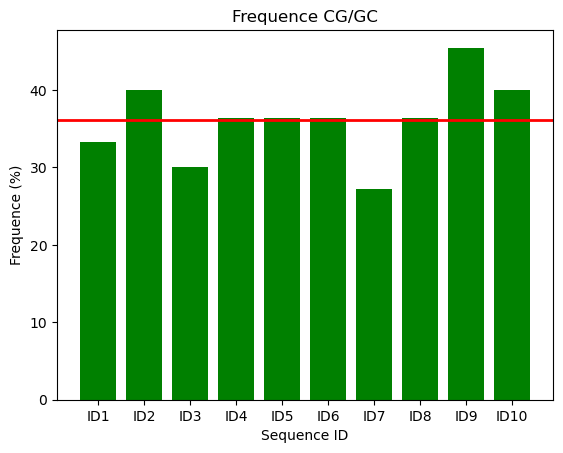

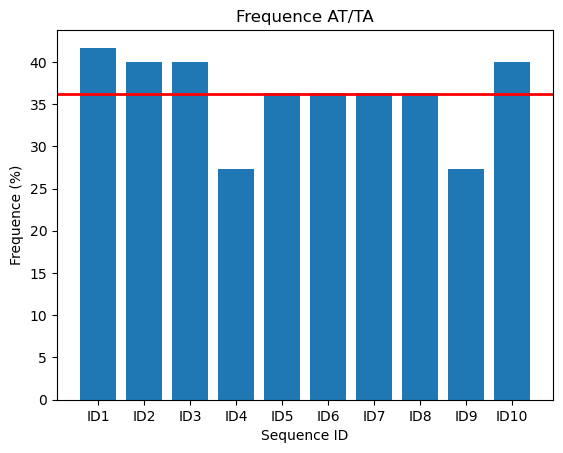

In [407]:
plot_stat(graph_title="Frequence CG/GC",average_val = average_GC,dict_fre=dict_frequencies_GC,bar_color="green")
plot_stat(graph_title="Frequence AT/TA",average_val = average_AT,dict_fre=dict_frequencies_AT)